# FEATURE ENGINEERING

Importing Libraries and Packages.

In [1]:
import pandas as pd
import numpy as np

In [4]:
from sklearn.preprocessing import StandardScaler

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
from sklearn.preprocessing import StandardScaler

In [39]:
from sklearn.model_selection import train_test_split

In [41]:
from sklearn.linear_model import LogisticRegression

In [43]:
from sklearn import metrics

In [49]:
import matplotlib.pyplot as plt

In [51]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter 
from sklearn.datasets import make_classification

In [55]:
from imblearn.over_sampling import RandomOverSampler  

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [62]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('../Desktop/CC.csv', encoding='latin_1')

In [3]:
df2= df.copy()

In [5]:
L1 = [cols for cols in df.columns if cols not in ["time","class"]]

In [6]:
df

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284795,284803,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284796,284804,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284797,284805,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284798,284806,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
df = df.drop(['Amount', 'Time', 'Class'], axis=1)

In [8]:
df

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,5,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284795,284803,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284796,284804,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284797,284805,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284798,284806,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


In [9]:
df.mean(axis=1)

0            0.140750
1            0.222060
2            0.141080
3            0.054842
4            0.357887
             ...     
284795    9820.786043
284796    9820.846095
284797    9821.096027
284798    9821.091175
284799    9820.847659
Length: 284800, dtype: float64

In [10]:
df['average'] = df.mean(numeric_only=True, axis=1)

In [11]:
df

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,average
0,1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.140750
1,2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.222060
2,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.141080
3,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.054842
4,5,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.357887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284795,284803,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,9820.786043
284796,284804,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,9820.846095
284797,284805,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,9821.096027
284798,284806,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,9821.091175


In [12]:
df2['average'] = df['average']

In [13]:
df2

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,average
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.140750
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.222060
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.141080
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.054842
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.357887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284795,284803,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,9820.786043
284796,284804,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,9820.846095
284797,284805,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,9821.096027
284798,284806,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,9821.091175


In [14]:
df=df2.copy()

In [15]:
df['min']= df['Time']/60

In [16]:
df

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V23,V24,V25,V26,V27,V28,Amount,Class,average,min
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.140750,0.000000
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.222060,0.000000
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.141080,0.016667
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.054842,0.016667
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.357887,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284795,284803,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,9820.786043,2879.766667
284796,284804,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,9820.846095,2879.783333
284797,284805,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,9821.096027,2879.800000
284798,284806,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,9821.091175,2879.800000


In [17]:
df = df.head(284799) 

In [18]:
df

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V23,V24,V25,V26,V27,V28,Amount,Class,average,min
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.140750,0.000000
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.222060,0.000000
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.141080,0.016667
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.054842,0.016667
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.357887,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284794,284802,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,...,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0,9820.746507,2879.750000
284795,284803,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,9820.786043,2879.766667
284796,284804,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,9820.846095,2879.783333
284797,284805,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,9821.096027,2879.800000


In [19]:
df['Amount'].describe()

count    284799.000000
mean         88.351254
std         250.123152
min           0.000000
25%           5.600000
50%          22.000000
75%          77.170000
max       25691.160000
Name: Amount, dtype: float64

In [20]:
import warnings 
warnings.filterwarnings('ignore')

In [21]:
a1 = df['Time'].values
a2 = a1[:-1] - a1[1:]
df.drop(df.tail(1).index,inplace=True)
df['time_difference'] = a2

In [22]:
df

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V24,V25,V26,V27,V28,Amount,Class,average,min,time_difference
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.140750,0.000000,0.0
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.222060,0.000000,-1.0
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.141080,0.016667,0.0
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.054842,0.016667,-1.0
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.357887,0.033333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284793,284801,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,...,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0,9820.708467,2879.733333,-1.0
284794,284802,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,...,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0,9820.746507,2879.750000,-1.0
284795,284803,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,9820.786043,2879.766667,-1.0
284796,284804,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,9820.846095,2879.783333,-1.0


In [23]:
df.loc[df.Amount <5.600000 , 'cond'] = 1
df.loc[df.Amount >77.170000 , 'cond'] = 3
df['cond'].fillna(2.0, inplace=True)

In [24]:
df

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V25,V26,V27,V28,Amount,Class,average,min,time_difference,cond
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.140750,0.000000,0.0,3.0
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.222060,0.000000,-1.0,1.0
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.141080,0.016667,0.0,3.0
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.054842,0.016667,-1.0,3.0
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.357887,0.033333,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284793,284801,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,...,-0.315610,0.201114,-0.080826,-0.075071,2.68,0,9820.708467,2879.733333,-1.0,1.0
284794,284802,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,...,-0.435870,0.124079,0.217940,0.068803,2.69,0,9820.746507,2879.750000,-1.0,1.0
284795,284803,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,1.436807,0.250034,0.943651,0.823731,0.77,0,9820.786043,2879.766667,-1.0,1.0
284796,284804,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,9820.846095,2879.783333,-1.0,2.0


# NORMALIZATION

In [27]:
scaler= StandardScaler()

In [28]:
df.columns

Index(['Unnamed: 0', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount', 'Class', 'average', 'min', 'time_difference', 'cond'],
      dtype='object')

In [29]:
f1=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount', 'average', 'time_difference', 'cond']

In [30]:
df[f1]= scaler.fit_transform(df[f1])

In [31]:
df

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V25,V26,V27,V28,Amount,Class,average,min,time_difference,cond
0,1,0.0,-0.694243,-0.044061,1.672767,0.973370,-0.245110,0.347088,0.193676,0.082640,...,0.246591,-0.392188,0.330885,-0.063776,0.244953,0,-1.732107,0.000000,0.575964,1.414228
1,2,0.0,0.608485,0.161188,0.109809,0.316534,0.043486,-0.061799,-0.063702,0.071256,...,0.320699,0.261051,-0.022257,0.044611,-0.342477,0,-1.732079,0.000000,-0.373369,-1.414238
2,3,1.0,-0.693501,-0.811556,1.169468,0.268243,-0.364563,1.351473,0.639770,0.207374,...,-0.628525,-0.288464,-0.137136,-0.181014,1.160662,0,-1.732107,0.016667,0.575964,1.414228
3,4,1.0,-0.493327,-0.112155,1.182516,-0.609706,-0.007466,0.936170,0.192068,0.316017,...,1.241902,-0.460235,0.155392,0.186190,0.140525,0,-1.732138,0.016667,-0.373369,1.414228
4,5,2.0,-0.591331,0.531549,1.021413,0.284667,-0.295008,0.072019,0.479297,-0.226503,...,-0.395192,1.041591,0.543610,0.651810,-0.073410,0,-1.732031,0.033333,0.575964,-0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284793,284801,172784.0,1.041271,-0.106103,-0.789309,0.165692,-0.006310,-0.545343,0.013780,-0.098984,...,-0.605444,0.417035,-0.200245,-0.227422,-0.342517,0,1.732006,2879.733333,-0.373369,-1.414238
284794,284802,172785.0,0.061420,0.563807,-0.360089,-0.526228,0.818914,-0.177101,0.656956,0.096367,...,-0.836145,0.257286,0.539938,0.208444,-0.342477,0,1.732019,2879.750000,-0.373369,-1.414238
284795,284803,172786.0,-6.065796,6.099240,-6.486155,-1.459611,-3.886551,-1.956668,-3.975603,6.116489,...,2.756309,0.518481,2.337865,2.495496,-0.350154,0,1.732033,2879.766667,-0.373369,-1.414238
284796,284804,172787.0,-0.374125,-0.033342,1.342142,-0.521632,0.629034,0.794466,0.019665,0.246886,...,-1.163711,-0.819663,0.169637,-0.162157,-0.254121,0,1.732054,2879.783333,-0.373369,-0.000005


In [32]:
df=df.drop(columns =['Unnamed: 0'])

In [33]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V25,V26,V27,V28,Amount,Class,average,min,time_difference,cond
0,0.0,-0.694243,-0.044061,1.672767,0.973370,-0.245110,0.347088,0.193676,0.082640,0.331130,...,0.246591,-0.392188,0.330885,-0.063776,0.244953,0,-1.732107,0.000000,0.575964,1.414228
1,0.0,0.608485,0.161188,0.109809,0.316534,0.043486,-0.061799,-0.063702,0.071256,-0.232485,...,0.320699,0.261051,-0.022257,0.044611,-0.342477,0,-1.732079,0.000000,-0.373369,-1.414238
2,1.0,-0.693501,-0.811556,1.169468,0.268243,-0.364563,1.351473,0.639770,0.207374,-1.378650,...,-0.628525,-0.288464,-0.137136,-0.181014,1.160662,0,-1.732107,0.016667,0.575964,1.414228
3,1.0,-0.493327,-0.112155,1.182516,-0.609706,-0.007466,0.936170,0.192068,0.316017,-1.262480,...,1.241902,-0.460235,0.155392,0.186190,0.140525,0,-1.732138,0.016667,-0.373369,1.414228
4,2.0,-0.591331,0.531549,1.021413,0.284667,-0.295008,0.072019,0.479297,-0.226503,0.744323,...,-0.395192,1.041591,0.543610,0.651810,-0.073410,0,-1.732031,0.033333,0.575964,-0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284793,172784.0,1.041271,-0.106103,-0.789309,0.165692,-0.006310,-0.545343,0.013780,-0.098984,0.396314,...,-0.605444,0.417035,-0.200245,-0.227422,-0.342517,0,1.732006,2879.733333,-0.373369,-1.414238
284794,172785.0,0.061420,0.563807,-0.360089,-0.526228,0.818914,-0.177101,0.656956,0.096367,-0.185735,...,-0.836145,0.257286,0.539938,0.208444,-0.342477,0,1.732019,2879.750000,-0.373369,-1.414238
284795,172786.0,-6.065796,6.099240,-6.486155,-1.459611,-3.886551,-1.956668,-3.975603,6.116489,1.742542,...,2.756309,0.518481,2.337865,2.495496,-0.350154,0,1.732033,2879.766667,-0.373369,-1.414238
284796,172787.0,-0.374125,-0.033342,1.342142,-0.521632,0.629034,0.794466,0.019665,0.246886,0.532298,...,-1.163711,-0.819663,0.169637,-0.162157,-0.254121,0,1.732054,2879.783333,-0.373369,-0.000005


In [34]:
import pickle
df.to_pickle(r'C:\Users\Vaishnavi M Shetty\Desktop\dfmod.pickle')

In [35]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V25,V26,V27,V28,Amount,Class,average,min,time_difference,cond
0,0.0,-0.694243,-0.044061,1.672767,0.973370,-0.245110,0.347088,0.193676,0.082640,0.331130,...,0.246591,-0.392188,0.330885,-0.063776,0.244953,0,-1.732107,0.000000,0.575964,1.414228
1,0.0,0.608485,0.161188,0.109809,0.316534,0.043486,-0.061799,-0.063702,0.071256,-0.232485,...,0.320699,0.261051,-0.022257,0.044611,-0.342477,0,-1.732079,0.000000,-0.373369,-1.414238
2,1.0,-0.693501,-0.811556,1.169468,0.268243,-0.364563,1.351473,0.639770,0.207374,-1.378650,...,-0.628525,-0.288464,-0.137136,-0.181014,1.160662,0,-1.732107,0.016667,0.575964,1.414228
3,1.0,-0.493327,-0.112155,1.182516,-0.609706,-0.007466,0.936170,0.192068,0.316017,-1.262480,...,1.241902,-0.460235,0.155392,0.186190,0.140525,0,-1.732138,0.016667,-0.373369,1.414228
4,2.0,-0.591331,0.531549,1.021413,0.284667,-0.295008,0.072019,0.479297,-0.226503,0.744323,...,-0.395192,1.041591,0.543610,0.651810,-0.073410,0,-1.732031,0.033333,0.575964,-0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284793,172784.0,1.041271,-0.106103,-0.789309,0.165692,-0.006310,-0.545343,0.013780,-0.098984,0.396314,...,-0.605444,0.417035,-0.200245,-0.227422,-0.342517,0,1.732006,2879.733333,-0.373369,-1.414238
284794,172785.0,0.061420,0.563807,-0.360089,-0.526228,0.818914,-0.177101,0.656956,0.096367,-0.185735,...,-0.836145,0.257286,0.539938,0.208444,-0.342477,0,1.732019,2879.750000,-0.373369,-1.414238
284795,172786.0,-6.065796,6.099240,-6.486155,-1.459611,-3.886551,-1.956668,-3.975603,6.116489,1.742542,...,2.756309,0.518481,2.337865,2.495496,-0.350154,0,1.732033,2879.766667,-0.373369,-1.414238
284796,172787.0,-0.374125,-0.033342,1.342142,-0.521632,0.629034,0.794466,0.019665,0.246886,0.532298,...,-1.163711,-0.819663,0.169637,-0.162157,-0.254121,0,1.732054,2879.783333,-0.373369,-0.000005


# IMPLEMENTATION

In [36]:
X = df.drop('Class', axis=1)
y = df['Class']

In [37]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,average,min,time_difference,cond
0,0.0,-0.694243,-0.044061,1.672767,0.973370,-0.245110,0.347088,0.193676,0.082640,0.331130,...,0.110479,0.246591,-0.392188,0.330885,-0.063776,0.244953,-1.732107,0.000000,0.575964,1.414228
1,0.0,0.608485,0.161188,0.109809,0.316534,0.043486,-0.061799,-0.063702,0.071256,-0.232485,...,-0.561171,0.320699,0.261051,-0.022257,0.044611,-0.342477,-1.732079,0.000000,-0.373369,-1.414238
2,1.0,-0.693501,-0.811556,1.169468,0.268243,-0.364563,1.351473,0.639770,0.207374,-1.378650,...,-1.138143,-0.628525,-0.288464,-0.137136,-0.181014,1.160662,-1.732107,0.016667,0.575964,1.414228
3,1.0,-0.493327,-0.112155,1.182516,-0.609706,-0.007466,0.936170,0.192068,0.316017,-1.262480,...,-1.941093,1.241902,-0.460235,0.155392,0.186190,0.140525,-1.732138,0.016667,-0.373369,1.414228
4,2.0,-0.591331,0.531549,1.021413,0.284667,-0.295008,0.072019,0.479297,-0.226503,0.744323,...,0.233224,-0.395192,1.041591,0.543610,0.651810,-0.073410,-1.732031,0.033333,0.575964,-0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284793,172784.0,1.041271,-0.106103,-0.789309,0.165692,-0.006310,-0.545343,0.013780,-0.098984,0.396314,...,-0.594066,-0.605444,0.417035,-0.200245,-0.227422,-0.342517,1.732006,2879.733333,-0.373369,-1.414238
284794,172785.0,0.061420,0.563807,-0.360089,-0.526228,0.818914,-0.177101,0.656956,0.096367,-0.185735,...,0.169708,-0.836145,0.257286,0.539938,0.208444,-0.342477,1.732019,2879.750000,-0.373369,-1.414238
284795,172786.0,-6.065796,6.099240,-6.486155,-1.459611,-3.886551,-1.956668,-3.975603,6.116489,1.742542,...,-0.841046,2.756309,0.518481,2.337865,2.495496,-0.350154,1.732033,2879.766667,-0.373369,-1.414238
284796,172787.0,-0.374125,-0.033342,1.342142,-0.521632,0.629034,0.794466,0.019665,0.246886,0.532298,...,-1.677981,-1.163711,-0.819663,0.169637,-0.162157,-0.254121,1.732054,2879.783333,-0.373369,-0.000005


In [38]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284793    0
284794    0
284795    0
284796    0
284797    0
Name: Class, Length: 284798, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=True)

In [42]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [44]:
y_pred = lr.predict(X_test)
print(metrics.classification_report(y_test, y_pred))


print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test)))
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56867
           1       0.76      0.58      0.66        93

    accuracy                           1.00     56960
   macro avg       0.88      0.79      0.83     56960
weighted avg       1.00      1.00      1.00     56960

Accuracy :0.99902
AUC : 0.79017
Precision : 0.76056
Recall : 0.58065
F1 : 0.65854


In [45]:
pd.Series(y_test).value_counts()

0    56867
1       93
Name: Class, dtype: int64

In [46]:
pd.Series(y_pred).value_counts()

0    56889
1       71
dtype: int64

In [47]:
71/93

0.7634408602150538

In [48]:
y_pred_proba = lr.predict_proba(X_test)
y_pred_proba

array([[9.99998505e-01, 1.49450901e-06],
       [9.99976204e-01, 2.37962989e-05],
       [9.98097499e-01, 1.90250084e-03],
       ...,
       [9.99989642e-01, 1.03583328e-05],
       [9.00812470e-01, 9.91875301e-02],
       [9.99088871e-01, 9.11128830e-04]])

AUC -  0.7901731090711376 



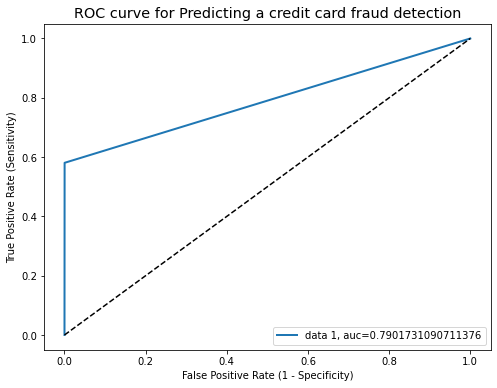

In [50]:
plt.figure(figsize=(8,6))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")
plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [52]:
print('Original dataset shape %s' % Counter(y))
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 284306, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=23)
# Undersampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test)))
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.95528
AUC : 0.95399
Precision : 0.96364
Recall : 0.93805
F1 : 0.95067


AUC -  0.953988954687604 



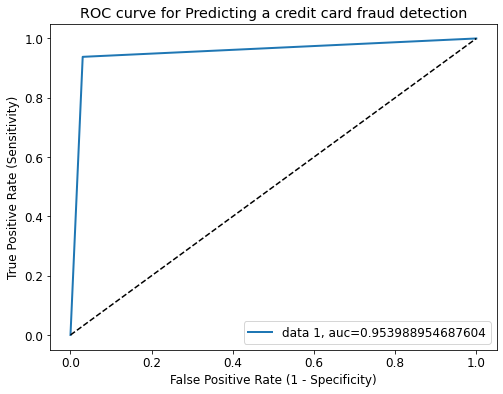

In [54]:
plt.figure(figsize=(8,6))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")
plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [56]:
print('Original dataset shape %s' % Counter(y))
random_state = 42
ros = RandomOverSampler(random_state=random_state)
X_res, y_res = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 284306, 1: 492})
Resampled dataset shape Counter({0: 284306, 1: 284306})


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)
# Oversampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred)))
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.94296
AUC : 0.94305
Precision : 0.97757
Recall : 0.90703
F1 : 0.94098


In [58]:
from imblearn.over_sampling import SMOTE


print('Original dataset shape %s' % Counter(y))
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 284306, 1: 492})
Resampled dataset shape Counter({0: 284306, 1: 284306})


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)
# SMOTE Sampling with Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred)))
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.97671
AUC : 0.97674
Precision : 0.98930
Recall : 0.96397
F1 : 0.97647


AUC -  0.9767424369161031 



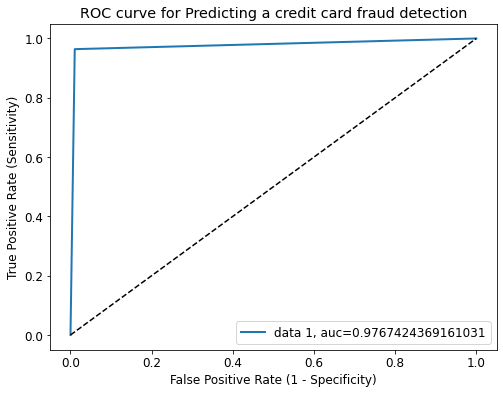

In [60]:
plt.figure(figsize=(8,6))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")
plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [63]:
names_lst = []
# Empty list to capture performance matrix for train set
aucs_train_lst = []
accuracy_train_lst = []
precision_train_lst = []
recall_train_lst = []
f1_train_lst = []
# Empty list to capture performance matrix for test set
aucs_test_lst = []
accuracy_test_lst = []
precision_test_lst = []
recall_test_lst = []
f1_test_lst = []

In [64]:
# Function for model building and performance measure

def build_measure_model(models):
    plt.figure(figsize=(12,6))

    for name, model,Xdata,ydata in models:
        
        names_lst.append(name)

        # split data in train test set
        X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.25, random_state=42)
        
        # Build model
        model.fit(X_train, y_train)
        
        # Predict
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # calculate accuracy
        Accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
        accuracy_train_lst.append(Accuracy_train)
        
        Accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
        accuracy_test_lst.append(Accuracy_test)

        # calculate auc
        Aucs_train = metrics.roc_auc_score(y_train, y_train_pred)
        aucs_train_lst.append(Aucs_train)
        
        Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
        aucs_test_lst.append(Aucs_test)

        # calculate precision
        PrecisionScore_train = metrics.precision_score(y_train , y_train_pred)
        precision_train_lst.append(PrecisionScore_train)
        
        PrecisionScore_test = metrics.precision_score(y_test , y_test_pred)
        precision_test_lst.append(PrecisionScore_test)

        # calculate recall
        RecallScore_train = metrics.recall_score(y_train , y_train_pred)
        recall_train_lst.append(RecallScore_train)
        
        RecallScore_test = metrics.recall_score(y_test , y_test_pred)
        recall_test_lst.append(RecallScore_test)

        # calculate f1 score
        F1Score_train = metrics.f1_score(y_train , y_train_pred)
        f1_train_lst.append(F1Score_train)
        
        F1Score_test = metrics.f1_score(y_test , y_test_pred)
        f1_test_lst.append(F1Score_test)

        #print('F1 Score of '+ name +' model : {0:0.5f}'.format(F1Score_test))

        # draw confusion matrix
        cnf_matrix = metrics.confusion_matrix(y_test , y_test_pred)

        print("Model Name :", name)
        
        print('Train Accuracy :{0:0.5f}'.format(Accuracy_train)) 
        print('Test Accuracy :{0:0.5f}'.format(Accuracy_test))
        
        print('Train AUC : {0:0.5f}'.format(Aucs_train))
        print('Test AUC : {0:0.5f}'.format(Aucs_test))
        
        print('Train Precision : {0:0.5f}'.format(PrecisionScore_train))
        print('Test Precision : {0:0.5f}'.format(PrecisionScore_test))
        
        print('Train Recall : {0:0.5f}'.format(RecallScore_train))
        print('Test Recall : {0:0.5f}'.format(RecallScore_test))
        
        print('Train F1 : {0:0.5f}'.format(F1Score_train))
        print('Test F1 : {0:0.5f}'.format(F1Score_test))
        
        print('Confusion Matrix : \n', cnf_matrix)
        print("\n")


        # plot ROC Curve
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(auc))
    
        #---------- For loops ends here--------#


    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for Predicting a credit card fraud detection')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

In [65]:
print('Original dataset shape %s' % Counter(y))
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_under))
# Slit into train and test datasets
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, random_state=42)


print('Original dataset shape %s' % Counter(y))
ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_over))
# Slit into train and test datasets
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, random_state=42)


print('Original dataset shape %s' % Counter(y))
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_smote))
# Slit into train and test datasets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, random_state=42)

Original dataset shape Counter({0: 284306, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})
Original dataset shape Counter({0: 284306, 1: 492})
Resampled dataset shape Counter({0: 284306, 1: 284306})
Original dataset shape Counter({0: 284306, 1: 492})
Resampled dataset shape Counter({0: 284306, 1: 284306})


Model Name : LR imbalance
Train Accuracy :0.99931
Test Accuracy :0.99906
Train AUC : 0.83328
Test AUC : 0.77907
Train Precision : 0.91176
Test Precision : 0.82716
Train Recall : 0.66667
Test Recall : 0.55833
Train F1 : 0.77019
Test F1 : 0.66667
Confusion Matrix : 
 [[71066    14]
 [   53    67]]


Model Name : LR Undersampling
Train Accuracy :0.93496
Test Accuracy :0.93089
Train AUC : 0.93537
Test AUC : 0.92956
Train Precision : 0.98503
Test Precision : 0.98131
Train Recall : 0.88441
Test Recall : 0.87500
Train F1 : 0.93201
Test F1 : 0.92511
Confusion Matrix : 
 [[124   2]
 [ 15 105]]


Model Name : LR Oversampling
Train Accuracy :0.93490
Test Accuracy :0.93447
Train AUC : 0.93485
Test AUC : 0.93462
Train Precision : 0.98785
Test Precision : 0.98662
Train Recall : 0.88051
Test Recall : 0.88125
Train F1 : 0.93109
Test F1 : 0.93096
Confusion Matrix : 
 [[70034   852]
 [ 8463 62804]]


Model Name : LR SMOTE
Train Accuracy :0.96039
Test Accuracy :0.95933
Train AUC : 0.96037
Test AUC : 0.95

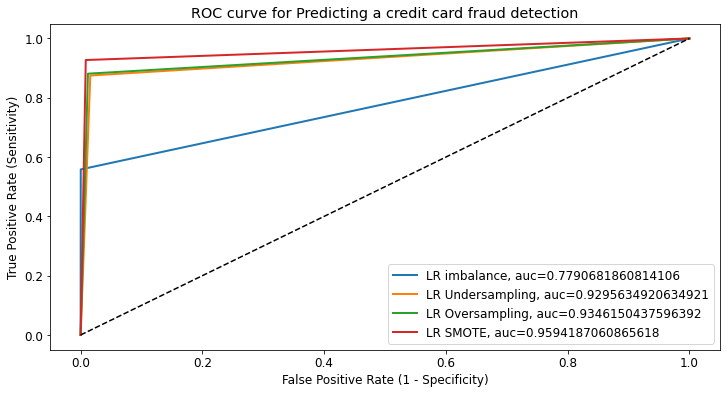

In [66]:
#------------------ Logistic Regression (LR) ------------------#
LRmodels = []

LRmodels.append(('LR imbalance', LogisticRegression(solver='liblinear', multi_class='ovr'),X,y))
LRmodels.append(('LR Undersampling', LogisticRegression(solver='liblinear', multi_class='ovr'),X_under,y_under))
LRmodels.append(('LR Oversampling', LogisticRegression(solver='liblinear', multi_class='ovr'),X_over,y_over))
LRmodels.append(('LR SMOTE', LogisticRegression(solver='liblinear', multi_class='ovr'),X_smote,y_smote))

# Call function to create model and measure its performance
build_measure_model(LRmodels)

Model Name : DT imbalance
Train Accuracy :1.00000
Test Accuracy :0.99904
Train AUC : 1.00000
Test AUC : 0.84977
Train Precision : 1.00000
Test Precision : 0.72414
Train Recall : 1.00000
Test Recall : 0.70000
Train F1 : 1.00000
Test F1 : 0.71186
Confusion Matrix : 
 [[71048    32]
 [   36    84]]


Model Name : DT Undersampling
Train Accuracy :1.00000
Test Accuracy :0.90244
Train AUC : 1.00000
Test AUC : 0.90179
Train Precision : 1.00000
Test Precision : 0.92105
Train Recall : 1.00000
Test Recall : 0.87500
Train F1 : 1.00000
Test F1 : 0.89744
Confusion Matrix : 
 [[117   9]
 [ 15 105]]


Model Name : DT Oversampling
Train Accuracy :1.00000
Test Accuracy :0.99969
Train AUC : 1.00000
Test AUC : 0.99969
Train Precision : 1.00000
Test Precision : 0.99938
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 1.00000
Test F1 : 0.99969
Confusion Matrix : 
 [[70842    44]
 [    0 71267]]


Model Name : DT SMOTE
Train Accuracy :1.00000
Test Accuracy :0.99864
Train AUC : 1.00000
Test AUC : 0.99

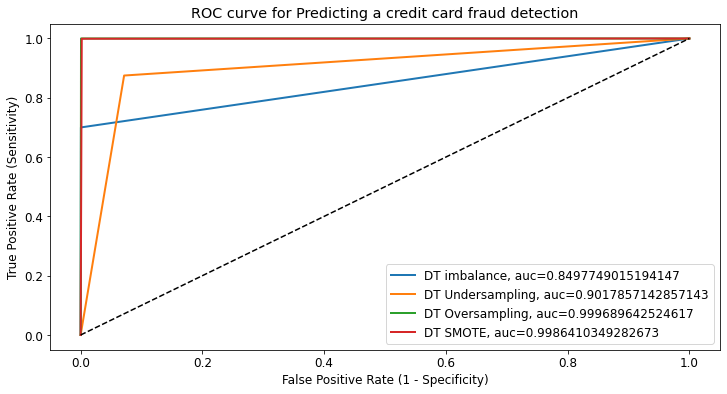

In [67]:
#-----------------Decision Tree (DT)------------------#
DTmodels = []

dt = DecisionTreeClassifier()

DTmodels.append(('DT imbalance', dt,X,y))
DTmodels.append(('DT Undersampling', dt,X_under,y_under))
DTmodels.append(('DT Oversampling', dt,X_over,y_over))
DTmodels.append(('DT SMOTE', dt,X_smote,y_smote))

# Call function to create model and measure its performance
build_measure_model(DTmodels)

Model Name : RF imbalance
Train Accuracy :1.00000
Test Accuracy :0.99938
Train AUC : 1.00000
Test AUC : 0.83331
Train Precision : 1.00000
Test Precision : 0.95238
Train Recall : 1.00000
Test Recall : 0.66667
Train F1 : 1.00000
Test F1 : 0.78431
Confusion Matrix : 
 [[71076     4]
 [   40    80]]


Model Name : RF Undersampling
Train Accuracy :1.00000
Test Accuracy :0.91870
Train AUC : 1.00000
Test AUC : 0.91766
Train Precision : 1.00000
Test Precision : 0.95455
Train Recall : 1.00000
Test Recall : 0.87500
Train F1 : 1.00000
Test F1 : 0.91304
Confusion Matrix : 
 [[121   5]
 [ 15 105]]


Model Name : RF Oversampling
Train Accuracy :1.00000
Test Accuracy :0.99995
Train AUC : 1.00000
Test AUC : 0.99995
Train Precision : 1.00000
Test Precision : 0.99990
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 1.00000
Test F1 : 0.99995
Confusion Matrix : 
 [[70879     7]
 [    0 71267]]


Model Name : RF SMOTE
Train Accuracy :1.00000
Test Accuracy :0.99990
Train AUC : 1.00000
Test AUC : 0.99

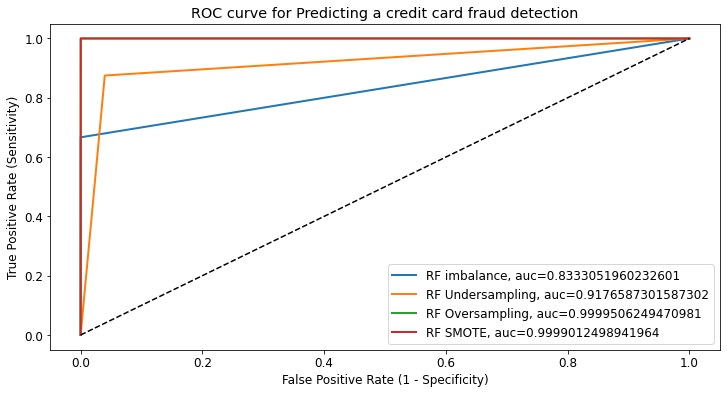

In [68]:
#-----------------Random Forest (RF) ------------------#
RFmodels = []

RFmodels.append(('RF imbalance', RandomForestClassifier(),X,y))
RFmodels.append(('RF Undersampling', RandomForestClassifier(),X_under,y_under))
RFmodels.append(('RF Oversampling', RandomForestClassifier(),X_over,y_over))
RFmodels.append(('RF SMOTE', RandomForestClassifier(),X_smote,y_smote))

# Call function to create model and measure its performance
build_measure_model(RFmodels)

In [69]:
# #------------------ K-Nearest Neighbors (KNN) ------------------#
# KNNmodels = []

# KNNmodels.append(('KNN imbalance', KNeighborsClassifier(),X,y))
# KNNmodels.append(('KNN Undersampling', KNeighborsClassifier(),X_under,y_under))
# KNNmodels.append(('KNN Oversampling', KNeighborsClassifier(),X_over,y_over))
# KNNmodels.append(('KNN SMOTE', KNeighborsClassifier(),X_smote,y_smote))

# Call function to create model and measure its performance
# build_measure_model(KNNmodels)

Model Name : NB imbalance
Train Accuracy :0.99372
Test Accuracy :0.99381
Train AUC : 0.82377
Test AUC : 0.79308
Train Precision : 0.16690
Test Precision : 0.15335
Train Recall : 0.65323
Test Recall : 0.59167
Train F1 : 0.26586
Test F1 : 0.24357
Confusion Matrix : 
 [[70688   392]
 [   49    71]]


Model Name : NB Undersampling
Train Accuracy :0.85230
Test Accuracy :0.85366
Train AUC : 0.85343
Test AUC : 0.85000
Train Precision : 0.98885
Test Precision : 1.00000
Train Recall : 0.71505
Test Recall : 0.70000
Train F1 : 0.82995
Test F1 : 0.82353
Confusion Matrix : 
 [[126   0]
 [ 36  84]]


Model Name : NB Oversampling
Train Accuracy :0.87923
Test Accuracy :0.87894
Train AUC : 0.87913
Test AUC : 0.87924
Train Precision : 0.98911
Test Precision : 0.98978
Train Recall : 0.76669
Test Recall : 0.76644
Train F1 : 0.86381
Test F1 : 0.86391
Confusion Matrix : 
 [[70322   564]
 [16645 54622]]


Model Name : NB SMOTE
Train Accuracy :0.86814
Test Accuracy :0.86702
Train AUC : 0.86803
Test AUC : 0.86

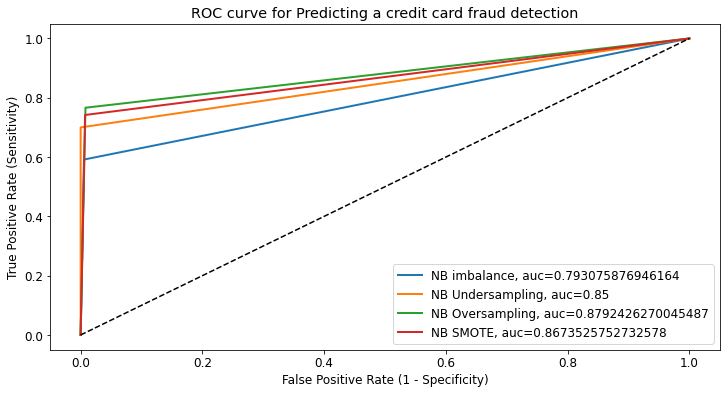

In [70]:
#------------------ Gaussian Naive Bayes (NB) ------------------#
NBmodels = []

NBmodels.append(('NB imbalance', GaussianNB(),X,y))
NBmodels.append(('NB Undersampling', GaussianNB(),X_under,y_under))
NBmodels.append(('NB Oversampling', GaussianNB(),X_over,y_over))
NBmodels.append(('NB SMOTE', GaussianNB(),X_smote,y_smote))

# Call function to create model and measure its performance
build_measure_model(NBmodels)